In [69]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

df = pd.read_csv('/Users/akounoroushi/Desktop/claims_final.csv')
df.columns = ['Family ID', 'Member ID', 'Provider ID', 'Provider Type', 'State', 'Date', 'Procedure', 'Amount']
df.head()

,Family ID,Member ID,Provider ID,Provider Type,State,Date,Procedure,Amount
0,327546,0,2299,122398719,NY,20060526,280,381.37
1,342944,5,5367,122398782,NY,20060817,1688,889.29
2,342944,5,5367,122398782,NY,20060717,1688,889.29
3,72526,0,9029,122398719,NY,20060221,562,1681.68
4,234943,1,10215,122398719,FL,20060615,288,336.63


In [70]:
type0 = df.loc[df['Provider Type'] == 122398719]
type0.head()

,Family ID,Member ID,Provider ID,Provider Type,State,Date,Procedure,Amount
0,327546,0,2299,122398719,NY,20060526,280,381.37
3,72526,0,9029,122398719,NY,20060221,562,1681.68
4,234943,1,10215,122398719,FL,20060615,288,336.63
5,375277,2,3939,122398719,NY,20060413,515,1403.40
6,55460,0,14582,122398719,NY,20060413,283,942.77


In [21]:
df['Provider Type'].unique()

array([122398719, 122398782, 122399961, 122398807, 122398769, 122398794,
       122398744, 122398857, 122401188, 122398832, 122398819, 122398757,
       122398732])

In [24]:
type0Pro = type0['Procedure'].unique()
type0Pro

array([ 280,  562,  288, ..., 1276, 1571,  795])

# Extract data by Provider Type and Procedure so that we can make comparison

In [72]:
Pro01 = type0.loc[type0['Procedure'] == 562]
Pro01.head()

,Family ID,Member ID,Provider ID,Provider Type,State,Date,Procedure,Amount
3,72526,0,9029,122398719,NY,20060221,562,1681.68
7654,192453,1,10989,122398719,NY,20060226,562,1314.20
8893,75363,1,13767,122398719,NY,20060626,562,1681.68
12718,192047,0,2530,122398719,NY,20060814,562,1195.48
13309,44899,0,15219,122398719,NY,20060808,562,1421.28


In [119]:
# Get an unique ID for each patient
patientID = []
for index, row in Pro01.iterrows():
    patientID.append(row['Family ID'] * 10 + row['Member ID'])

Pro01['Patient ID'] = patientID

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [120]:
# Normalize the amount of claimed money
Pro01['amountLog'] = Pro01['Amount'].apply(np.log)
normedAmount = []
for index, row in Pro01.iterrows():
    normedAmount.append((row['amountLog'] - Pro01['amountLog'].mean()) / Pro01['amountLog'].std())
Pro01['Normed amount'] = normedAmount
Pro01.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Family ID,Member ID,Provider ID,Provider Type,State,Date,Procedure,Amount,inlier,Patient ID,Normed amount,patientCount,Normed patient count,providerCount,Normed provider count,amountLog,patientCountLog,providerCountLog,Score
3,72526,0,9029,122398719,NY,20060221,562,1681.68,1,725260,0.696837,1,-0.399465,3,-0.205038,7.427549,0.000000,1.098612,-0.996566
7654,192453,1,10989,122398719,NY,20060226,562,1314.20,1,1924531,-0.399618,1,-0.399465,29,1.870197,7.180983,0.000000,3.367296,-1.035858
8893,75363,1,13767,122398719,NY,20060626,562,1681.68,1,753631,0.696837,1,-0.399465,11,0.983456,7.427549,0.000000,2.397895,-1.055166
12718,192047,0,2530,122398719,NY,20060814,562,1195.48,1,1920470,-0.820653,1,-0.399465,5,0.262230,7.086303,0.000000,1.609438,-1.009499
13309,44899,0,15219,122398719,NY,20060808,562,1421.28,1,448990,-0.051292,2,1.730352,10,0.896273,7.259313,0.693147,2.302585,-1.012578


In [108]:
# Normatize the frequency of each provider gives the same procedure to the same patient
Pro01['patientCount'] = Pro01.groupby('Patient ID')['Patient ID'].transform('count')
Pro01['patientCountLog'] = Pro01['patientCount'].apply(np.log)
normedPatientCount = []
for index, row in Pro01.iterrows():
    normedPatientCount.append((row['patientCountLog'] - Pro01['patientCountLog'].mean()) / Pro01['patientCountLog'].std())
Pro01['Normed patient count'] = normedPatientCount
Pro01.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,Family ID,Member ID,Provider ID,Provider Type,State,Date,Procedure,Amount,inlier,Patient ID,Normed amount,patientCount,Normed patient count,providerCount,Normed provider count,amountLog,patientCountLog
3,72526,0,9029,122398719,NY,20060221,562,1681.68,1,725260,0.696837,1,-0.399465,3,-0.473105,7.427549,0.000000
7654,192453,1,10989,122398719,NY,20060226,562,1314.20,1,1924531,-0.399618,1,-0.399465,29,2.672289,7.180983,0.000000
8893,75363,1,13767,122398719,NY,20060626,562,1681.68,1,753631,0.696837,1,-0.399465,11,0.494708,7.427549,0.000000
12718,192047,0,2530,122398719,NY,20060814,562,1195.48,-1,1920470,-0.820653,1,-0.399465,5,-0.231152,7.086303,0.000000
13309,44899,0,15219,122398719,NY,20060808,562,1421.28,1,448990,-0.051292,2,1.730352,10,0.373732,7.259313,0.693147


In [110]:
# Normatize the frequency of each patient receives the same procedure from the same type of provider
Pro01['providerCount'] = Pro01.groupby('Provider ID')['Provider ID'].transform('count')
Pro01['providerCountLog'] = Pro01['providerCount'].apply(np.log)
normedProviderCount = []
for index, row in Pro01.iterrows():
    normedProviderCount.append((row['providerCountLog'] - Pro01['providerCountLog'].mean()) / Pro01['providerCountLog'].std())
Pro01['Normed provider count'] = normedProviderCount
Pro01.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,Family ID,Member ID,Provider ID,Provider Type,State,Date,Procedure,Amount,inlier,Patient ID,Normed amount,patientCount,Normed patient count,providerCount,Normed provider count,amountLog,patientCountLog,providerCountLog
3,72526,0,9029,122398719,NY,20060221,562,1681.68,1,725260,0.696837,1,-0.399465,3,-0.205038,7.427549,0.000000,1.098612
7654,192453,1,10989,122398719,NY,20060226,562,1314.20,1,1924531,-0.399618,1,-0.399465,29,1.870197,7.180983,0.000000,3.367296
8893,75363,1,13767,122398719,NY,20060626,562,1681.68,1,753631,0.696837,1,-0.399465,11,0.983456,7.427549,0.000000,2.397895
12718,192047,0,2530,122398719,NY,20060814,562,1195.48,-1,1920470,-0.820653,1,-0.399465,5,0.262230,7.086303,0.000000,1.609438
13309,44899,0,15219,122398719,NY,20060808,562,1421.28,1,448990,-0.051292,2,1.730352,10,0.896273,7.259313,0.693147,2.302585


# Use LocalOutlierFactor to detect outliers

In [114]:
# Features used hare are the frequency of each patient receives the same procedure from the same type of provider, 
# the frequency of each provider gives the same procedure to the same patient, and the amount of money
lof = LocalOutlierFactor()
lof.fit(Pro01[['Normed patient count', 'Normed provider count', 'Normed amount']])

LocalOutlierFactor(algorithm='auto', contamination=0.1, leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=20,
          p=2)

In [115]:
# Inlier column is 1 if it is inlier, -1 otherwise.
inlier = lof.fit_predict(Pro01[['Normed patient count', 'Normed provider count', 'Normed amount']])
Pro01['inlier'] = inlier
Pro01.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Family ID,Member ID,Provider ID,Provider Type,State,Date,Procedure,Amount,inlier,Patient ID,Normed amount,patientCount,Normed patient count,providerCount,Normed provider count,amountLog,patientCountLog,providerCountLog
3,72526,0,9029,122398719,NY,20060221,562,1681.68,1,725260,0.696837,1,-0.399465,3,-0.205038,7.427549,0.000000,1.098612
7654,192453,1,10989,122398719,NY,20060226,562,1314.20,1,1924531,-0.399618,1,-0.399465,29,1.870197,7.180983,0.000000,3.367296
8893,75363,1,13767,122398719,NY,20060626,562,1681.68,1,753631,0.696837,1,-0.399465,11,0.983456,7.427549,0.000000,2.397895
12718,192047,0,2530,122398719,NY,20060814,562,1195.48,1,1920470,-0.820653,1,-0.399465,5,0.262230,7.086303,0.000000,1.609438
13309,44899,0,15219,122398719,NY,20060808,562,1421.28,1,448990,-0.051292,2,1.730352,10,0.896273,7.259313,0.693147,2.302585


In [117]:
# Get LOF scored based on features. The smaller the score is, the more abnormal it is. We may sort by this score.
score = getattr(lof, 'negative_outlier_factor_')
Pro01['Score'] = score
Pro01.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Family ID,Member ID,Provider ID,Provider Type,State,Date,Procedure,Amount,inlier,Patient ID,Normed amount,patientCount,Normed patient count,providerCount,Normed provider count,amountLog,patientCountLog,providerCountLog,Score
3,72526,0,9029,122398719,NY,20060221,562,1681.68,1,725260,0.696837,1,-0.399465,3,-0.205038,7.427549,0.000000,1.098612,-0.996566
7654,192453,1,10989,122398719,NY,20060226,562,1314.20,1,1924531,-0.399618,1,-0.399465,29,1.870197,7.180983,0.000000,3.367296,-1.035858
8893,75363,1,13767,122398719,NY,20060626,562,1681.68,1,753631,0.696837,1,-0.399465,11,0.983456,7.427549,0.000000,2.397895,-1.055166
12718,192047,0,2530,122398719,NY,20060814,562,1195.48,1,1920470,-0.820653,1,-0.399465,5,0.262230,7.086303,0.000000,1.609438,-1.009499
13309,44899,0,15219,122398719,NY,20060808,562,1421.28,1,448990,-0.051292,2,1.730352,10,0.896273,7.259313,0.693147,2.302585,-1.012578


### Vidualize LOF

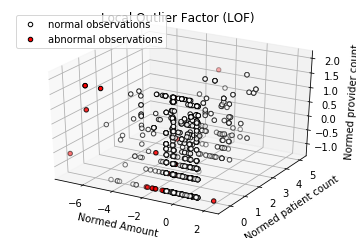

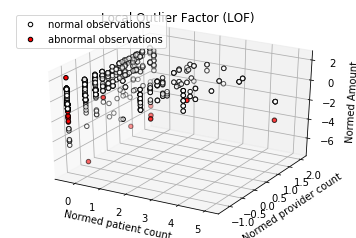

In [116]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.title("Local Outlier Factor (LOF)")

inlierPatient = []
inlierProvider = []
inlierAmount = []
outlierPatient = []
outlierProvider = []
outlierAmount = []

for index, row in Pro01.iterrows():
    if row['inlier'] == 1:
        inlierPatient.append(row['Normed patient count'])
        inlierProvider.append(row['Normed provider count'])
        inlierAmount.append(row['Normed amount'])
    else:
        outlierPatient.append(row['Normed patient count'])
        outlierProvider.append(row['Normed provider count'])
        outlierAmount.append(row['Normed amount'])
        
a = ax.scatter(inlierAmount, inlierPatient, inlierProvider, c='white',
                edgecolor='k', s=20)
b = ax.scatter(outlierAmount, outlierPatient, outlierProvider, c='red',
                edgecolor='k', s=20)
ax.set_xlabel('Normed Amount')
ax.set_ylabel('Normed patient count')
ax.set_zlabel('Normed provider count')

plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.title("Local Outlier Factor (LOF)")

a = ax.scatter(inlierPatient, inlierProvider, inlierAmount, c='white',
                edgecolor='k', s=20)
b = ax.scatter(outlierPatient, outlierProvider, outlierAmount, c='red',
                edgecolor='k', s=20)
ax.set_xlabel('Normed patient count')
ax.set_ylabel('Normed provider count')
ax.set_zlabel('Normed Amount')

plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()